Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线形图

## 线形图

简单的Series图表示例,plot()

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.arange(2010,2018,1)

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [3]:
s = Series(index = np.arange(2010,2018,1),data = [100,110,90,300,700,2000,5000,10000])

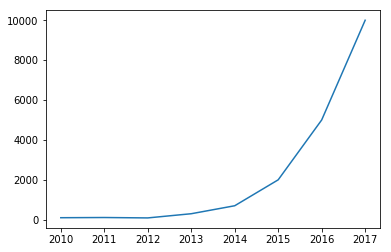

In [4]:
s.plot()

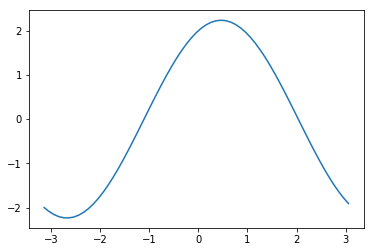

In [11]:
x = np.arange(-np.pi,np.pi,0.1)
y = np.sin(x) + 2*np.cos(x)
s1 = Series(index=x,data=y)
s1.plot(kind='line')

简单的DataFrame图表示例,plot()

- 图例的位置可能会随着数据的不同而不同

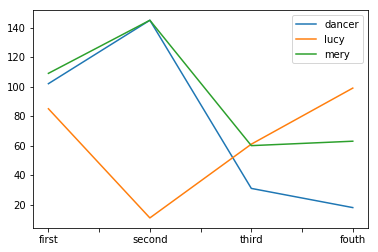

In [22]:
columns = ['dancer','lucy','mery']
index = ['first','second','third','fouth']
data = np.random.randint(0,150,size=(4,3))
df = DataFrame(data=data,index=index,columns=columns)
df.plot()

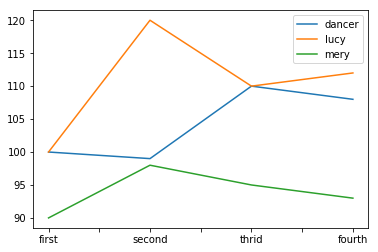

In [26]:
score = pd.read_excel('score.xls')
# 版面的绘制
score.plot()
# 图片保存

## 柱状图

Series柱状图示例,kind = 'bar'/'barh'

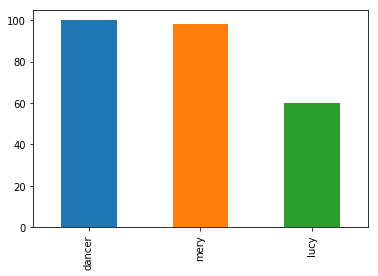

In [27]:
s = Series(index=['dancer','mery','lucy'],data=[100,98,60])
s.plot(kind='bar')

DataFrame柱状图示例

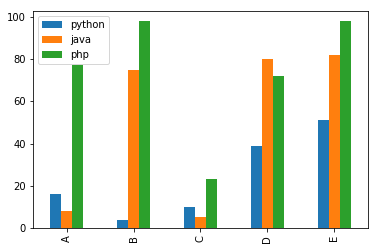

In [28]:
data = np.random.randint(0,100,size=(5,3))
index = list('ABCDE')
columns = ['python','java','php']
df = DataFrame(data=data,index=index,columns=columns)
df.plot(kind='bar')

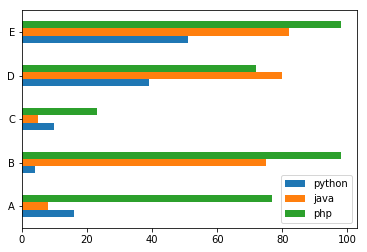

In [29]:
df.plot(kind='barh')

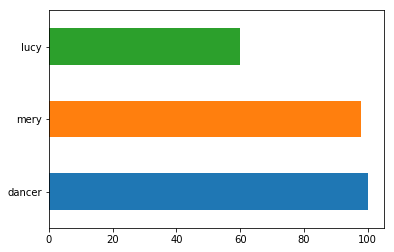

In [30]:
s.plot(kind='barh')

读取文件tips.csv，查看每天的聚会人数情况
每天各种聚会规模的比例  

求和并df.sum()，注意灵活使用axis

In [31]:
tips = pd.read_csv('tips.csv')
tips

,day,1,2,3,4,5,6
0,Fri,1,16,1,1,0,0
1,Stat,2,53,18,13,1,0
2,Sun,0,39,15,18,3,1
3,Thur,1,48,4,5,1,3


In [36]:
# 把一列变成索引
data = tips.set_index('day')
# 把索引变成列
# tips.reset_index()

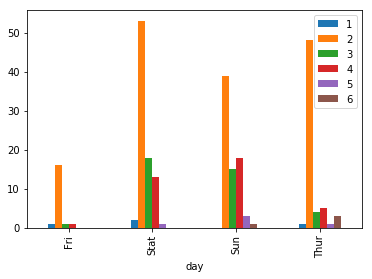

In [37]:
data.plot(kind='bar')

In [41]:
# 计算每一行的和
index_sum = data.sum(axis=1)

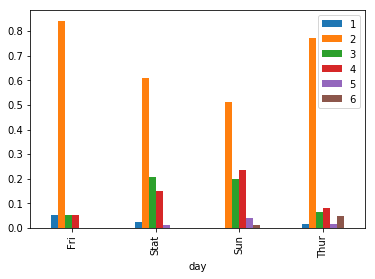

In [45]:
# 计算每天每种聚会人数所占比例
result = data.div(index_sum,axis=0)
result.plot(kind='bar')

## 直方图

rondom生成随机数百分比直方图，调用hist方法

- 柱高表示数据的频数，柱宽表示各组数据的组距
- 参数bins可以设置直方图方柱的个数上限，越大柱宽越小，数据分组越细致
- 设置normed参数为True，可以把频数转换为概率

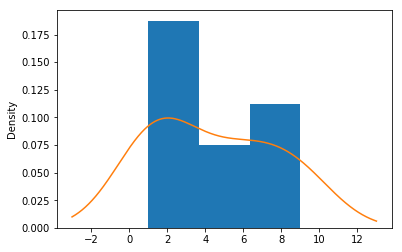

In [52]:
s = Series(data = [1,2,1,1,3,5,6,7,9,9])
# 直方图会受到bins（数据分区的个数）影响很大
# 设置normed参数为True，直方图表示的是每一个数出现的概率
s.plot(kind='hist',bins=3,normed=True)
# 为了避免歧义，直方图会跟核密度估计函数一起使用
s.plot(kind='kde')

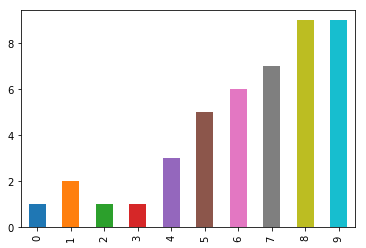

In [48]:
s.plot(kind='bar')

kde图：核密度估计，用于弥补直方图由于参数bins设置的不合理导致的精度缺失问题

#### 练习

绘制一个由两个不同的标准正态分布组成的的双峰分布

In [58]:
# 生成两个一维数组，符合正太分布，期望值分别为0和20
x1 = Series(np.random.normal(loc=0,scale=3,size=100))
x2 = Series(np.random.normal(loc=20,scale=5,size=100))
# 级联两个Series对象并重置索引
s = pd.concat((x1,x2),ignore_index=True)
s

0       3.249873
1      -2.589494
2      -2.247292
3      -2.127396
4       0.521159
5      -6.084171
6       1.686359
7      -2.565004
8      -0.647332
9       4.161788
10     -2.924241
11     -1.938118
12      1.259324
13      0.941385
14     -4.316892
15      0.085348
16     -2.213873
17     -0.809423
18     -2.917220
19     -2.672856
20     -2.066799
21      1.865616
22     -1.852503
23      3.604442
24     -1.411063
25      0.165386
26     -1.337435
27      3.754387
28     -6.199200
29      3.019002
         ...    
170    22.595197
171    23.492841
172    22.738205
173    14.255180
174    22.229389
175    19.190084
176    22.902848
177    14.744843
178    18.963592
179    29.699166
180    14.663104
181    26.470372
182    24.512165
183    27.617378
184    12.798938
185    18.160538
186    18.083601
187    22.163000
188    17.011587
189    22.897459
190    26.887293
191    15.718268
192    21.277874
193    18.267735
194    18.242399
195    27.474724
196    34.169240
197    22.9595

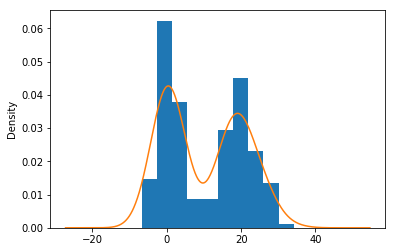

In [61]:
s.plot(kind='hist',normed=True)
s.plot(kind='kde')

## 散布图

散布图
散布图是观察两个一维数据数列之间的关系的有效方法,DataFrame对象可用 

使用方法：
设置kind = 'scatter'，给明标签columns

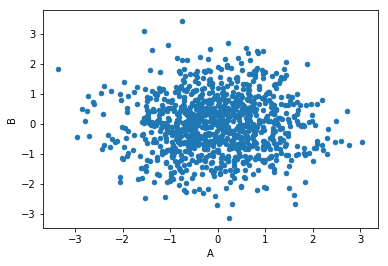

In [63]:
data = np.random.normal(size=(1000,4))
columns = list('ABCD')
df = DataFrame(data=data,columns=columns)
df.plot(x='A',y='B',kind='scatter')

散布图矩阵，当有多个点时，两两点的关系  

使用函数：pd.plotting.scatter_matrix(),
- 参数diagnol：设置对角线的图像类型

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15A2BDF0>,
      dtype=object)

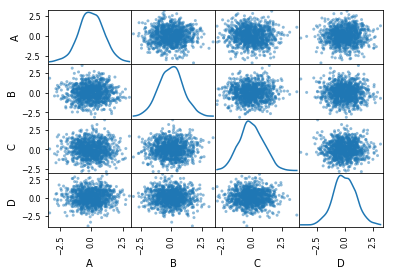

In [68]:
pd.plotting.scatter_matrix(df,diagonal='kde')